In [16]:
# pip install scikit-learn


In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
iris = load_iris()
print("\nDescrição do dataser Iris")
print(iris.DESCR)

print("\nPrimeiras 5 amostras")
print(iris.data[:5])

print('\nNomes das caracteristicas:')
print(iris.feature_names)

print('\nNomes das classes:')
print(iris.target_names)


Descrição do dataser Iris
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3%

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

print(f"\nFormato dos dados: Treino{X_train.shape}, teste= {X_test.shape}")


Formato dos dados: Treino(120, 4), teste= (30, 4)


In [20]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [23]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"\nAcurácia no treino: {train_accuracy:.2f}")
print(f"\nAcurácia no teste: {test_accuracy:.2f}")


Acurácia no treino: 0.97

Acurácia no teste: 1.00


In [25]:
exemplo = [[5.1, 3.5, 1.4, 0.2]] # Dados de uma nova flor
predicao = model.predict(exemplo)
print(f"\nPrevisão para a flor analisada: {iris.target_names[predicao][0]}")



Previsão para a flor analisada: setosa


In [26]:
exemplo = [[5.1, 3.5, 2.4, 7.2]] # Dados de uma nova flor
predicao2 = model.predict(exemplo)
print(f"\nPrevisão para a flor analisada: {iris.target_names[predicao2][0]}")


Previsão para a flor analisada: virginica


In [38]:
exemplo = [[81.1, 10.5, 9.9, 9.2]] # Dados de uma nova flor
predicao3 = model.predict(exemplo)
print(f"\nPrevisão para a flor analisada: {iris.target_names[predicao3][0]}")


Previsão para a flor analisada: versicolor


# Regressão

## Regressão Linear Simples: Número de Quartos x Preço de Casa

## Geração e visualização dos dados

Nesta parte do código, criamos dados simulados para representar a relação entre o número de quartos de uma casa e seu preço.

- `X` representa o número de quartos, com valores entre 0 e 2.
- `y` representa o preço da casa, calculado com base no número de quartos e uma variação aleatória para simular ruído nos dados (como acontece no mundo real).

Depois disso, mostramos os 5 primeiros exemplos e utilizamos um gráfico de dispersão para visualizar a relação entre número de quartos e preço. Isso nos ajuda a entender se existe uma tendência ou padrão nos dados.




In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


Primeiros 5 exemplos:
X (Quartos): [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728]
y (Quartos): [6.33428778 9.40527849 8.48372443 5.60438199 4.71643995]


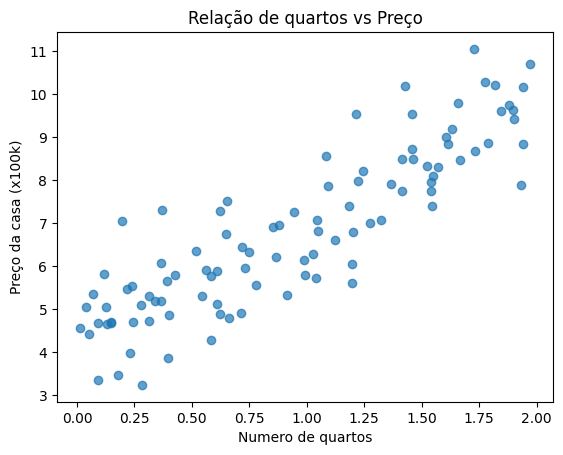

In [9]:
np.random.seed(42)                          # Define uma semente aleatória para garantir os mesmos resultados sempre que rodar
X = 2 * np.random.rand(100, 1)              # Gera 100 valores aleatórios entre 0 e 2 para representar o número de quartos
y = 4 + 3 * X + np.random.randn(100, 1)     # # Cria os preços das casas com base no número de quartos, adicionando um pouco de "ruído" (variação aleatória)

print("\nPrimeiros 5 exemplos:")
print(f"X (Quartos): {X[:5].flatten()}")    # Mostra os primeiros 5 valores de X
print(f"y (Quartos): {y[:5].flatten()}")    # Mostra os primeiros 5 valores de y

# Cria um gráfico de dispersão (scatter plot) para visualizar a relação entre quartos e preço
plt.scatter(X, y, alpha=0.7)
plt.xlabel('Número de quartos')
plt.ylabel('Preço da casa (x100k)')
plt.title('Relação de quartos vs Preço')
plt.show()

## Trecho 02: Treinamento do modelo de regressão linear

Aqui utilizamos o modelo de **Regressão Linear** do scikit-learn para aprender a relação entre o número de quartos (`X`) e o preço das casas (`y`).

- O método `fit(X, y)` treina o modelo com os dados fornecidos.
- Em seguida, mostramos os dois parâmetros aprendidos:
  - **Intercepto (b)**: valor inicial da reta (preço base de uma casa sem quartos).
  - **Coeficiente angular (a)**: indica o quanto o preço aumenta para cada quarto a mais.

Esses valores definem a reta de regressão: `preço = b + a * quartos`.


In [10]:
# Cria o modelo de regressão linear e treina com os dados
model = LinearRegression()
model.fit(X, y)

# Mostra os parâmetros do modelo treinado
print(f"\nIntercepto (b): {model.intercept_[0]:.2f}")           # Valor onde a linha cruza o eixo Y
print(f"\nCoeficiente angular (a): {model.coef_[0][0]:.2f}")    # Inclinação da linha (quanto o preço aumenta por quarto)


Intercepto (b): 4.22

Coeficiente angular (a): 2.77


# Previsões

## Previsão e visualização da reta de regressão

Neste trecho, fazemos uma **previsão de preço** para uma casa com 1.5 quartos, usando o modelo treinado.

- A previsão é feita com `model.predict()`.
- Depois, mostramos o valor previsto de forma clara.
- Por fim, é exibido um gráfico com:
  - Os dados reais (pontos no gráfico).
  - A linha da regressão (em vermelho), mostrando o ajuste feito pelo modelo.

Este gráfico é importante para visualizar como o modelo se ajusta aos dados e entender se ele está representando bem a tendência geral.


Previsão para casa com 1.5 quartos: 8.37x100k


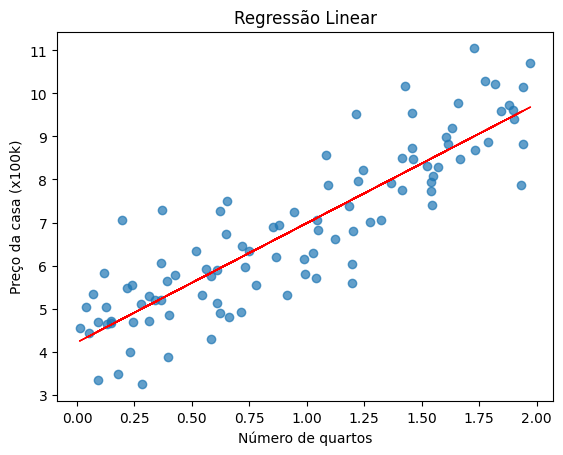

In [16]:
# Faz uma previsão para uma casa com 1.5 quartos
X_new = np.array([[1.5]])
y_pred = model.predict(X_new)
print(f'Previsão para casa com 1.5 quartos: {y_pred[0][0]:.2f}x100k')

# Plota os dados e adiciona a linha da regressão em vermelho
plt.scatter(X, y, alpha=0.7)
plt.plot(X, model.predict(X), color='red', linewidth=1)
plt.xlabel('Número de quartos')
plt.ylabel('Preço da casa (x100k)')
plt.title('Regressão Linear')
plt.show()
